# Libraries

In [86]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training
from sklearn import linear_model
from sklearn import metrics
# from tqdm import tqdm

# Loading Dataset

In [87]:
X, y, ID = data_loader.load_dataset(X_path='data/2023-11-08/feature_mfcc_34_delta_delta_nfft_4096.csv', 
                                    y_path='data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_4096.csv',
                                    ID_path='data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_4096.csv')

data loaded in 0.0936727523803711ms
          0         1         2         3         4         5         6  \
0  0.327805 -0.464719 -0.540320 -0.983787 -1.276392 -0.517576 -0.059207   
1 -0.483202 -0.287426  0.073267 -0.259939 -1.043461  0.220426 -0.243781   
2 -0.982079  1.092156 -0.237941 -0.002997 -0.934974  0.313563  0.708375   
3  0.968642 -1.604765 -0.123183 -0.789169 -1.783557 -0.222486 -0.352760   
4  0.548607 -1.485735 -0.842989 -0.959707 -1.563772 -0.373401 -0.273213   

          7         8         9  ...       296       297       298       299  \
0 -1.325718 -0.865250 -1.400271  ... -0.000500  0.245232  0.467592  0.179897   
1 -0.745799 -0.558315 -0.667095  ...  0.081401 -0.156604  0.054227  1.335473   
2  0.392641 -0.112142 -0.675854  ...  1.159202 -0.281807  0.370446  0.969862   
3 -1.354752 -0.871037 -0.944073  ... -0.582348  1.606737 -1.213523  0.283672   
4 -1.374351 -0.530736 -0.333489  ... -0.312877 -1.016252 -0.713702  0.537837   

        300       301       302 

In [88]:
calm_feature_idx = np.load('data/feature_idx_calm.npy')
angry_feature_idx = np.load('data/feature_idx_angry.npy')
disgust_feature_idx = np.load('data/feature_idx_disgust.npy')
fear_feature_idx = np.load('data/feature_idx_fear.npy')
happy_feature_idx = np.load('data/feature_idx_happy.npy')
neutral_feature_idx = np.load('data/feature_idx_neutral.npy')
sad_feature_idx = np.load('data/feature_idx_sad.npy')
surprised_feature_idx = np.load('data/feature_idx_surprised.npy')

In [89]:
neutral_feature_idx

array([  0,  37,  38,  41,  42,  50,  54,  56,  67,  74,  91, 108, 109,
       111, 141, 142, 146, 150, 156, 160, 165, 175, 180, 182, 184, 185,
       189, 204, 207, 211, 214, 216, 217, 220, 221, 224, 228, 238, 239,
       240, 241, 243, 245, 248, 250, 253, 256, 259])

In [90]:
combined_unique_indices = np.unique(np.concatenate((calm_feature_idx, 
                                                   angry_feature_idx,
                                                  disgust_feature_idx,
                                                  fear_feature_idx,
                                                  happy_feature_idx,
                                                  neutral_feature_idx,
                                                  sad_feature_idx,
                                                  surprised_feature_idx)))
combined_unique_indices.shape

(217,)

In [91]:
combined_unique_indices

array([  0,   2,   4,   5,   6,   7,   8,  10,  11,  12,  14,  15,  16,
        17,  18,  19,  21,  22,  24,  25,  27,  28,  29,  30,  31,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  79,  80,  83,  84,  85,  86,  88,  91,  97,  98, 102,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119,
       120, 123, 124, 125, 126, 128, 130, 136, 137, 138, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       158, 160, 161, 162, 163, 165, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23

In [92]:
X_with_selected_features = pd.DataFrame(X.iloc[:, combined_unique_indices])
X_with_selected_features.shape

(1440, 217)

In [93]:
y

,0
0,surprised
1,happy
2,calm
3,happy
4,surprised
...,...
1435,surprised
1436,angry
1437,surprised
1438,disgust


In [94]:
label_mapping_dict = {'neutral': 1, 
                         'calm': 2, 
                         'happy': 3, 
                         'sad': 4, 
                         'angry': 5, 
                         'fear': 6, 
                         'disgust': 7, 
                         'surprised': 8}
y_converted = y.replace(label_mapping_dict)
y_converted

,0
0,8
1,3
2,2
3,3
4,8
...,...
1435,8
1436,5
1437,8
1438,7


# 5-fold CV (full feature space)

In [15]:
group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm)
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)

## GridSearch

 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.90it/s]

UAR = 0.391


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.76it/s]

UAR = 0.419


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.78it/s]

UAR = 0.419


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.46it/s]

UAR = 0.436


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.67it/s]

UAR = 0.456


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.86it/s]

UAR = 0.454


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.70it/s]

UAR = 0.444


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.93it/s]

UAR = 0.436


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.23it/s]

UAR = 0.429


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.17it/s]


UAR = 0.423
UAR_best = 0.456, C_best = 0.004


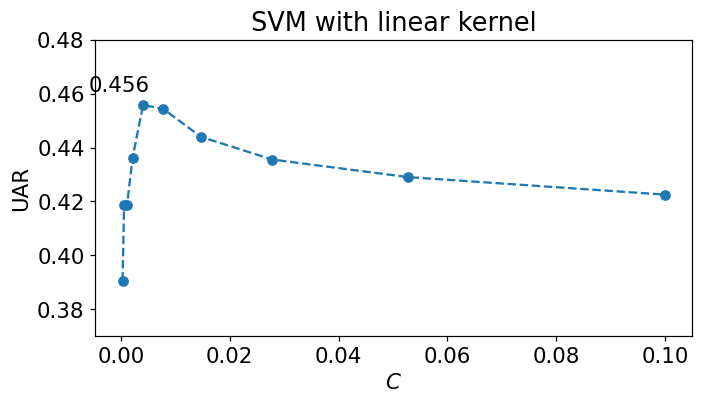

In [16]:
C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

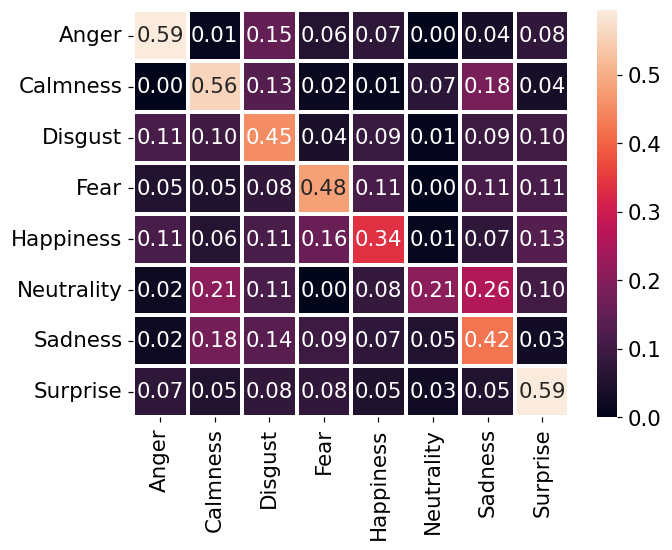

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [17]:
# Confusion matrix
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)

# 5-fold CV (selected feature space)

In [98]:
group_members= data_loader.get_k_fold_group_member()
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_with_selected_features, y_converted, ID, group_members)

## GridSearch

In [101]:
C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.42it/s]

UAR = 0.322
C = 0.100000, gamma = 0.000316


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.22it/s]

UAR = 0.329
C = 0.100000, gamma = 0.000527


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.07it/s]

UAR = 0.339
C = 0.100000, gamma = 0.000880


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.17it/s]

UAR = 0.359
C = 0.100000, gamma = 0.001468


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.03it/s]

UAR = 0.378
C = 0.100000, gamma = 0.002448


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.05it/s]

UAR = 0.394
C = 0.100000, gamma = 0.004084


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.388


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.346


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.288


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.37it/s]

UAR = 0.169


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.42it/s]

UAR = 0.328


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.39it/s]

UAR = 0.343


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.34it/s]

UAR = 0.379


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.52it/s]

UAR = 0.408
C = 0.187382, gamma = 0.001468


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.27it/s]

UAR = 0.408


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.13it/s]

UAR = 0.408


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.06it/s]

UAR = 0.392


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.361


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.288


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.31it/s]

UAR = 0.169


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.77it/s]

UAR = 0.359


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.42it/s]

UAR = 0.400


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.80it/s]

UAR = 0.415
C = 0.351119, gamma = 0.000880


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.97it/s]

UAR = 0.416
C = 0.351119, gamma = 0.001468


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.98it/s]

UAR = 0.415


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.27it/s]

UAR = 0.417
C = 0.351119, gamma = 0.004084


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.03it/s]

UAR = 0.409


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.391


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.16it/s]

UAR = 0.298


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.34it/s]

UAR = 0.169


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.77it/s]

UAR = 0.409


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.20it/s]

UAR = 0.426
C = 0.657933, gamma = 0.000527


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.02it/s]

UAR = 0.417


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.09it/s]

UAR = 0.425


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.80it/s]

UAR = 0.438
C = 0.657933, gamma = 0.002448


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.49it/s]

UAR = 0.440
C = 0.657933, gamma = 0.004084


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.444
C = 0.657933, gamma = 0.006813


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.422


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.339


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.14it/s]

UAR = 0.224


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.28it/s]

UAR = 0.417


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.43it/s]

UAR = 0.423


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.73it/s]

UAR = 0.439


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.54it/s]

UAR = 0.446
C = 1.232847, gamma = 0.001468


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.01it/s]

UAR = 0.464
C = 1.232847, gamma = 0.002448


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.09it/s]

UAR = 0.461


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.458


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.437


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.379


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.54it/s]

UAR = 0.308


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.72it/s]

UAR = 0.423


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.16it/s]

UAR = 0.441


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.93it/s]

UAR = 0.456


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.33it/s]

UAR = 0.462


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.65it/s]

UAR = 0.471
C = 2.310130, gamma = 0.002448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.469


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.470


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.443


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.380


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.15it/s]

UAR = 0.307


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.37it/s]

UAR = 0.438


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.48it/s]

UAR = 0.453


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.95it/s]

UAR = 0.463


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.68it/s]

UAR = 0.465


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.49it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.463


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.473
C = 4.328761, gamma = 0.006813


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.445


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.380


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.53it/s]

UAR = 0.307


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.81it/s]

UAR = 0.457


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.13it/s]

UAR = 0.460


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.63it/s]

UAR = 0.465


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.24it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.31it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.465


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.473
C = 8.111308, gamma = 0.006813


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.445


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.02it/s]

UAR = 0.380


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.77it/s]

UAR = 0.307


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.65it/s]

UAR = 0.467


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.74it/s]

UAR = 0.462


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.05it/s]

UAR = 0.462


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.95it/s]

UAR = 0.460


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.53it/s]

UAR = 0.463


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.465


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.473


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.445


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.380


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.76it/s]

UAR = 0.307


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.12it/s]

UAR = 0.462


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.62it/s]

UAR = 0.461


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.13it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.07it/s]

UAR = 0.460


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.29it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.465


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.473


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.445


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.380


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.63it/s]

UAR = 0.307


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.70it/s]

UAR = 0.463


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.09it/s]

UAR = 0.452


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.65it/s]

UAR = 0.461


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.05it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.46it/s]

UAR = 0.464


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.10it/s]

UAR = 0.465


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.473


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.445


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.380


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.85it/s]

UAR = 0.307


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.04it/s]

UAR = 0.452


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.42it/s]

UAR = 0.460


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.75it/s]

UAR = 0.456


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.00it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.67it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.465


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.473


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.445


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.380


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.61it/s]

UAR = 0.307
UAR_best = 0.473, C_best = 8.111308, gamma_best = 0.006813


## Result visualization

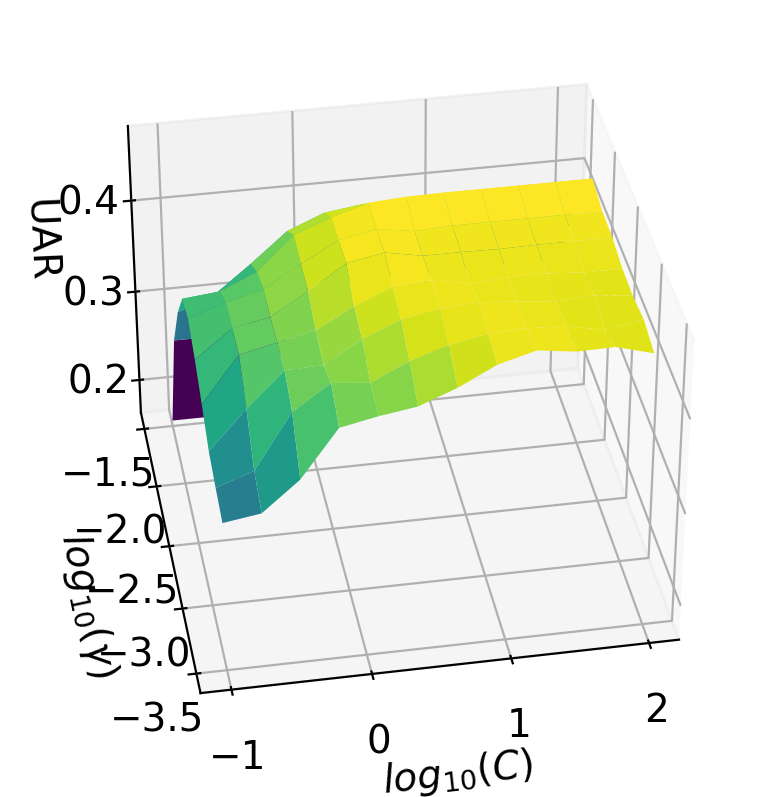

In [102]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
# ax.set_title('UAR')
ax.set_zlabel('$\mathrm{UAR}$')
ax.view_init(35, 260)
# plt.show()
# image_path = "Doc/figures/UAR_svm_rbf_4096.jpg"
# fig.savefig(image_path, format='jpg', dpi=200, bbox_inches='tight', pad_inches=0.2)

## Confusion matrix

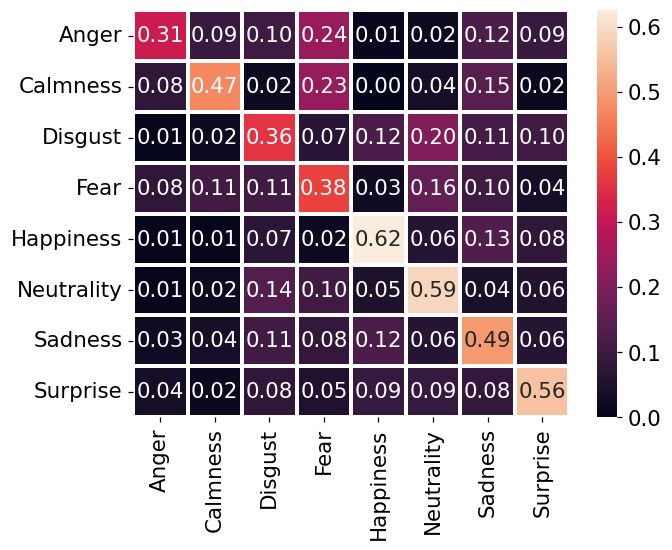

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [103]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)